In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn


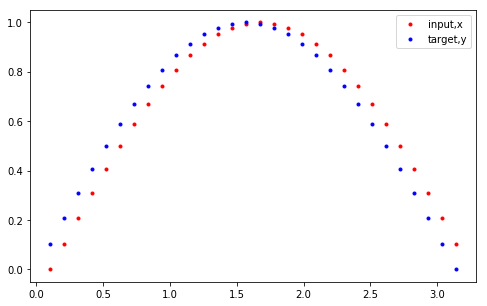

In [16]:
plt.figure(figsize=(8,5))

seq_length=30

time_steps=np.linspace(0,np.pi,seq_length+1)
data=np.sin(time_steps)
data.resize((seq_length+1,1))

x=data[:-1]
y=data[1:]

plt.plot(time_steps[1:],x,'r.',label='input,x')
plt.plot(time_steps[1:],y,'b.',label='target,y')

plt.legend(loc='best')
plt.show()



In [18]:
class RNN(nn.Module):
    def __init__(self,input_size,output_size,hidden_dim,n_layers):
        super(RNN,self).__init__()
        
        self.hidden_dim=hidden_dim
        
        self.rnn=nn.RNN(input_size,hidden_dim,n_layers,batch_first=True)
        
        self.fc=nn.Linear(hidden_dim, output_size)
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        
        r_out,hidden= self.rnn(x,hidden)
        r_out=r_out.view(-1,self.hidden_dim)
        
        output=self.fc(r_out)
        
        return output,hidden

In [24]:
test_rnn= RNN(input_size=1,output_size=1,hidden_dim=10,n_layers=2)

time_steps=np.linspace(0,np.pi,seq_length)
data=np.sin(time_steps)
data.resize((seq_length, 1))

test_input = torch.Tensor(data).unsqueeze(0)
print('Input Size:',test_input.size())

test_out,test_h = test_rnn(test_input, None)
print('Output size:', test_out.size())
print('Hidden state size: ', test_h.size())

Input Size: torch.Size([1, 30, 1])
Output size: torch.Size([30, 1])
Hidden state size:  torch.Size([2, 1, 10])


In [25]:
input_size =1
output_size=1
hidden_dim=32
n_layers=1

rnn=RNN(input_size,output_size,hidden_dim,n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [26]:
criterion=nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(),lr=0.01)

In [29]:
def train(rnn,n_steps,print_every):
    hidden=None
    
    for batch_i, step in enumerate(range(n_steps)):
        time_steps=np.linspace(step*np.pi,(step+1)*np.pi,seq_length+1)
        data=np.sin(time_steps)
        data.resize((seq_length+1,1))
        
        x=data[:-1]
        y=data[1:]
        
        x_tensor=torch.Tensor(x).unsqueeze(0)
        y_tensor=torch.Tensor(y)
        
        prediction, hidden =rnn(x_tensor,hidden)
        
        hidden=hidden.data
        
        loss=criterion(prediction,y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_i%print_every==0:
            print('Loss:', loss.item())
            plt.plot(time_steps[1:],x,'r.')
            plt.plot(time_steps[1:],prediction.data.numpy().flatten(),'b.')
            plt.show()
            
    return rnn

Loss: 0.2730938494205475


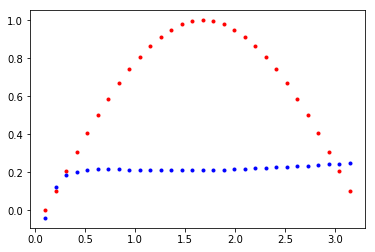

Loss: 0.0761517584323883


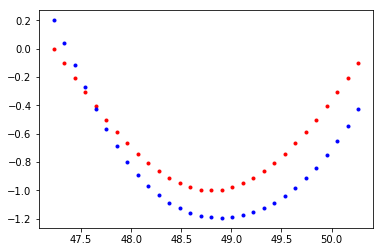

Loss: 0.010242343880236149


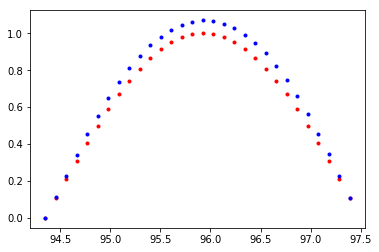

Loss: 0.0019087024265900254


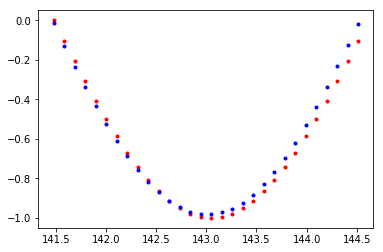

Loss: 0.0008478478412143886


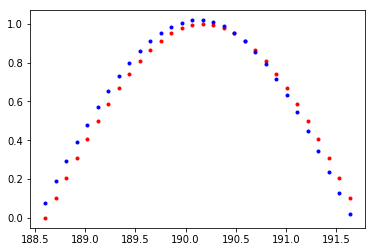

In [30]:
n_steps=75

print_every=15

trained_rnn=train(rnn, n_steps,print_every)